In [1]:

import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
dataset = randn(25)

(0.0, 1.0)

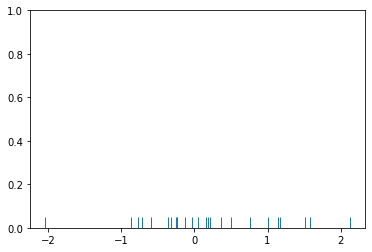

In [4]:
sns.rugplot(dataset)

plt.ylim(0,1)

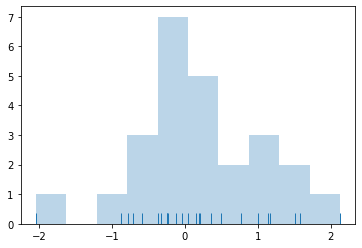

In [5]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

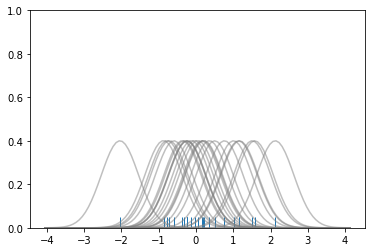

In [7]:
sns.rugplot(dataset)

x_min = dataset.min() -2
x_max = dataset.max() +2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset))) **0.2

kernel_list = []

for data_point in dataset:
    
    #create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scele for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel,color='grey',alpha=0.5)
    
    plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

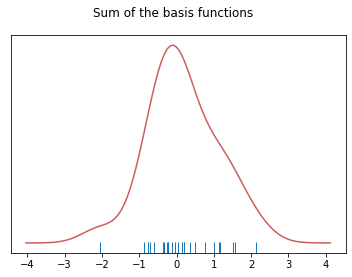

In [8]:
sum_of_kde= np.sum(kernel_list,axis=0)

fig= plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

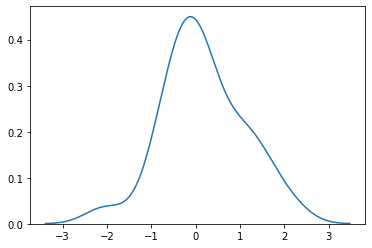

In [9]:
sns.kdeplot(dataset)

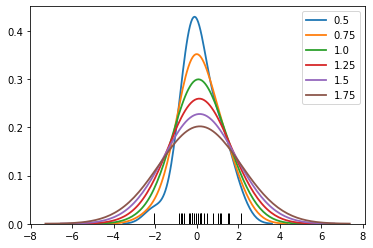

In [11]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)
    
    

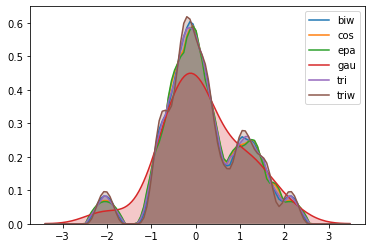

In [13]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

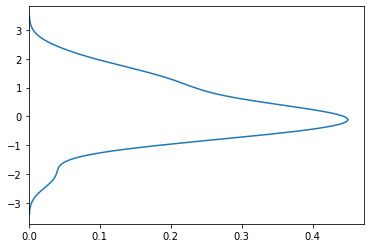

In [14]:
sns.kdeplot(dataset,vertical=True)

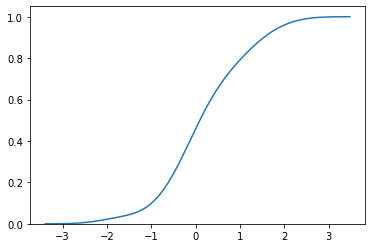

In [15]:
sns.kdeplot(dataset,cumulative=True)

C:\Users\niini\anaconda3\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


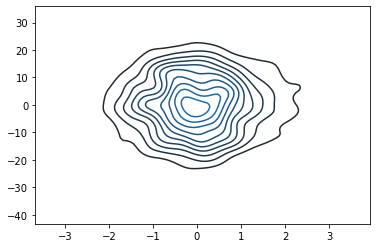

In [17]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['x','y'])

sns.kdeplot(dframe)

C:\Users\niini\anaconda3\lib\site-packages\seaborn\distributions.py:434: UserWarning: The following kwargs were not used by contour: 'columns'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


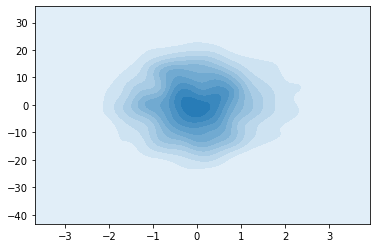

In [20]:
sns.kdeplot(dframe,columns=['x','y'],shade=True)


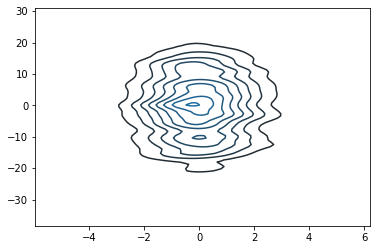

In [21]:
sns.kdeplot(dframe,bw=1)

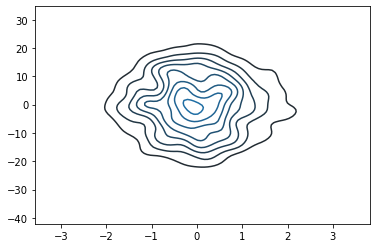

In [22]:
sns.kdeplot(dframe,bw='silverman')